# Duplicate Question Pairs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
# 404290 it is too large dataset for my processor to handle
# we will only use 50000 random of it

In [5]:
df1 = df.sample(70000,random_state=2)
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


# Preprocessing

In [7]:
def prepro(q):
    q = str(q).lower().strip()

    # replacing certain chars
    q = q.replace('%', 'percent')
    q = q.replace('$', 'dollar')
    q = q.replace('₹', 'rupee')
    q = q.replace('€', 'euro')
    q = q.replace('@', 'at')

    # in the dataset '[math]' appears mostly it dose'nt mean anything
    q = q.replace('[math]', '')
    q = q.replace(',000,000,000', 'b')
    q = q.replace(',000,000', 'm')
    q = q.replace(',000', 'k')
    q = re.sub(r'([0-9]+)000000000',r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontarcting words
    contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", ' have')
    q = q.replace("n't", ' not')
    q = q.replace("'re", ' are')
    q = q.replace("'ll", ' will')

    #reoving HTML tgs 
    q = BeautifulSoup(q)
    q = q.get_text()

    # remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ',q).strip()
    return q

In [8]:
prepro("I've already! wasn't <b>done<b>?")

'i have already  was not done'

In [9]:
df1['question1'] = df1['question1'].apply(prepro)
df1['question2'] = df1['question2'].apply(prepro)
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [10]:
df1['q1_len'] = df['question1'].str.len()
df1['q2_len'] = df['question2'].str.len()
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0


In [11]:
df1['q1_no_words'] = df1['question1'].apply(lambda x: len(x.split(' ')))
df1['q2_no_words'] = df1['question2'].apply(lambda x: len(x.split(' ')))
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9


In [12]:
x = "consequences of bhopal gas"
len(x.split(' '))

4

In [13]:
def common_words(text):
    w1 = set(map(lambda x : x.lower().strip(), text['question1'].split(" ")))
    w2 = set(map(lambda x : x.lower().strip(), text['question2'].split(" ")))
    return len(w1 & w2)
 

In [14]:
df1['common_words'] = df1.apply(common_words, axis=1)
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,common_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,3


In [15]:
def total_words(text):
    w1 = set(map(lambda x : x.lower().strip(), text['question1'].split(" ")))
    w2 = set(map(lambda x : x.lower().strip(), text['question2'].split(" ")))
    return len(w1) +  len(w2)

In [16]:
df1['total_words'] = df1.apply(total_words, axis=1)
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,common_words,total_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,3,13


In [17]:
df1['word_share'] = round(df1['common_words'] / df1['total_words'],2)
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,common_words,total_words,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,3,13,0.23


In [18]:
# ADVANCE FEATURING
#token features
from nltk.corpus import stopwords

def adv_features(row):
    q1 = row['question1']
    q2 = row['question2']

    stop_words = stopwords.words("english")

    q1_tok = q1.split()
    q2_tok = q2.split()

    token_features = [0.0]*8   #list with 8 zeros if no tokens are formed
    
    if len(q1_tok)==0 or len(q2_tok)==0:
        return token_features

    # non stopwords
    q1_words = set([word for word in q1_tok if word not in stop_words])
    q2_words = set([word for word in q2_tok if word not in stop_words])

    # stopwords
    q1_stopwords = set([word for word in q1_tok if word in stop_words])
    q2_stopwords = set([word for word in q2_tok if word in stop_words])


    common_word_count = len(q1_words.intersection(q2_words))
    common_stopword_count = len(q1_stopwords.intersection(q2_stopwords))
    common_token_count = len(set(q1_tok).intersection(set(q2_tok)))

    SAFE_DIV = 0.0001
    
    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV) #cwc_min
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV) #cwc_max
    token_features[2] = common_stopword_count / (min(len(q1_stopwords),len(q2_stopwords)) + SAFE_DIV) #csc_min
    token_features[3] = common_stopword_count / (max(len(q1_stopwords),len(q2_stopwords)) + SAFE_DIV) #cwc_max
    token_features[4] = common_token_count / (min(len(q1_tok),len(q2_tok)) + SAFE_DIV) #ctc_min
    token_features[5] = common_token_count / (max(len(q1_tok),len(q2_tok)) + SAFE_DIV) #ctc_max
    token_features[6] = int(q1_tok[0]==q2_tok[0]) #First_word_eq
    token_features[7] = int(q1_tok[-1]==q2_tok[-1]) #last_word_eq

    return token_features 

In [19]:
token_features = df1.apply(adv_features, axis=1)

df1['cwc_min']       = list(map(lambda x: x[0], token_features))
df1['cwc_max']       = list(map(lambda x: x[1], token_features))
df1['csc_min']       = list(map(lambda x: x[2], token_features))
df1['csc_max']       = list(map(lambda x: x[3], token_features))
df1['ctc_min']       = list(map(lambda x: x[4], token_features))
df1['ctc_max']       = list(map(lambda x: x[5], token_features))
df1['first_word_eq'] = list(map(lambda x: x[6], token_features))
df1['last_word_eq']  = list(map(lambda x: x[7], token_features))

df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,first_word_eq,last_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,...,24,0.33,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,...,38,0.11,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,...,34,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,0.0,1.0


In [20]:
#length features
import distance

def len_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # tokens
    q1_tok = q1.split()
    q2_tok = q2.split()

    if len(q1_tok)==0 or len(q2_tok)==0:
        return length_features
    length_features[0] = abs(len(q1_tok) - len(q2_tok)) # Absolute length features
    length_features[1] = (len(q1_tok) + len(q2_tok)) / 2  # Average Token Length of both question
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0]) / (min(len(q1),len(q2))+1)

    return length_features

In [21]:
length_features = df1.apply(len_features, axis=1)

df1['abs_len_diff'] = list(map(lambda x: x[0],length_features))
df1['mean_len']     = list(map(lambda x: x[1],length_features))
df1['longest_substr_ratio']     = list(map(lambda x: x[2],length_features))

df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,first_word_eq,last_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,...,0.599988,0.000000,0.000000,0.599988,0.333330,0.0,1.0,4.0,7.0,0.542857


In [22]:
# fuzzy features
from fuzzywuzzy import fuzz

def fuz_features(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [23]:
fuzzy_features = df1.apply(fuz_features, axis=1)
df1['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_features))
df1['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
df1['token_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
df1['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))

In [24]:
df1.shape

(70000, 28)

In [25]:
df1.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,...,ctc_max,first_word_eq,last_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,76.0,77.0,13,13,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,49.0,57.0,13,16,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,105.0,120.0,28,21,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,59.0,146.0,14,32,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,35.0,50.0,5,9,...,0.333330,0.0,1.0,4.0,7.0,0.542857,55,70,48,69


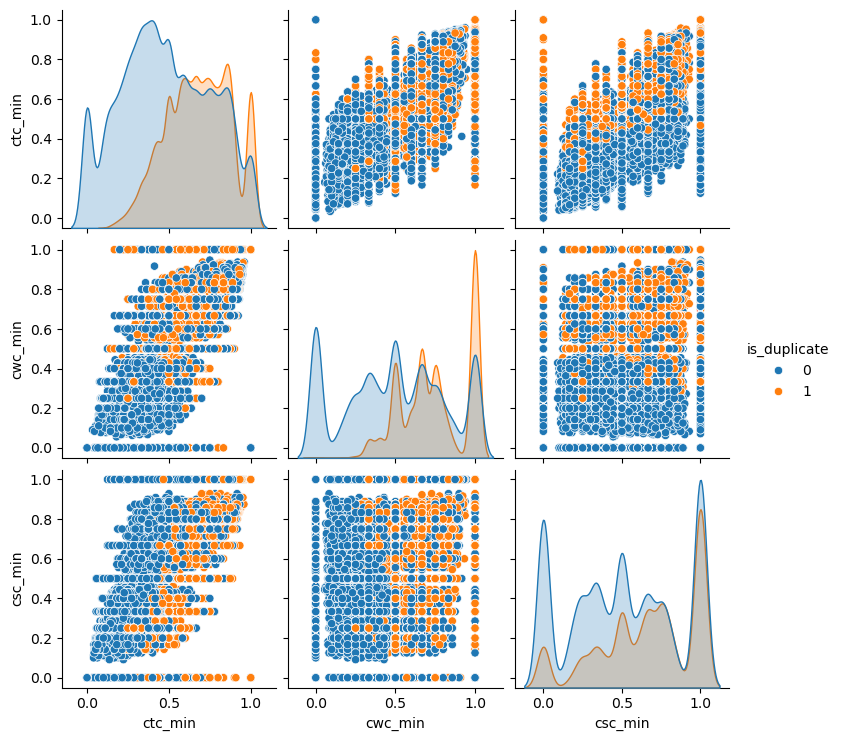

In [26]:
sns.pairplot(df1[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

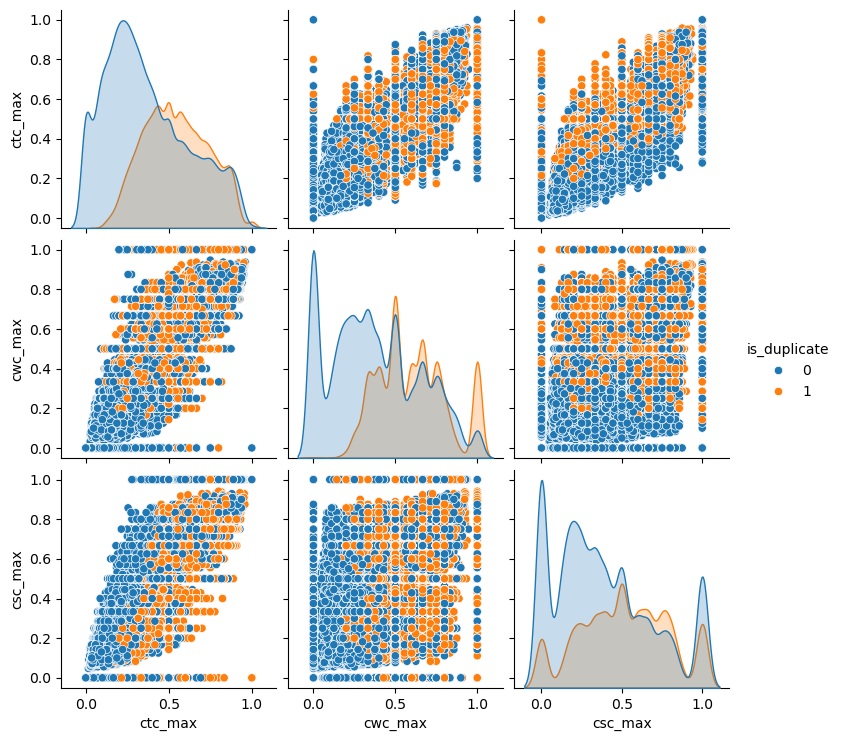

In [27]:
sns.pairplot(df1[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

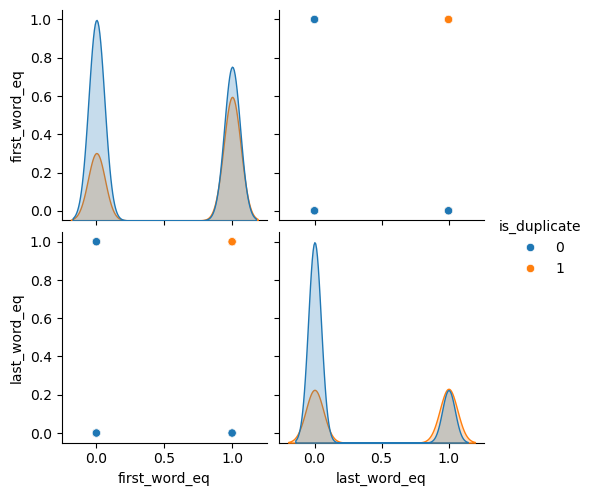

In [28]:
sns.pairplot(df1[['first_word_eq','last_word_eq','is_duplicate']],hue='is_duplicate')

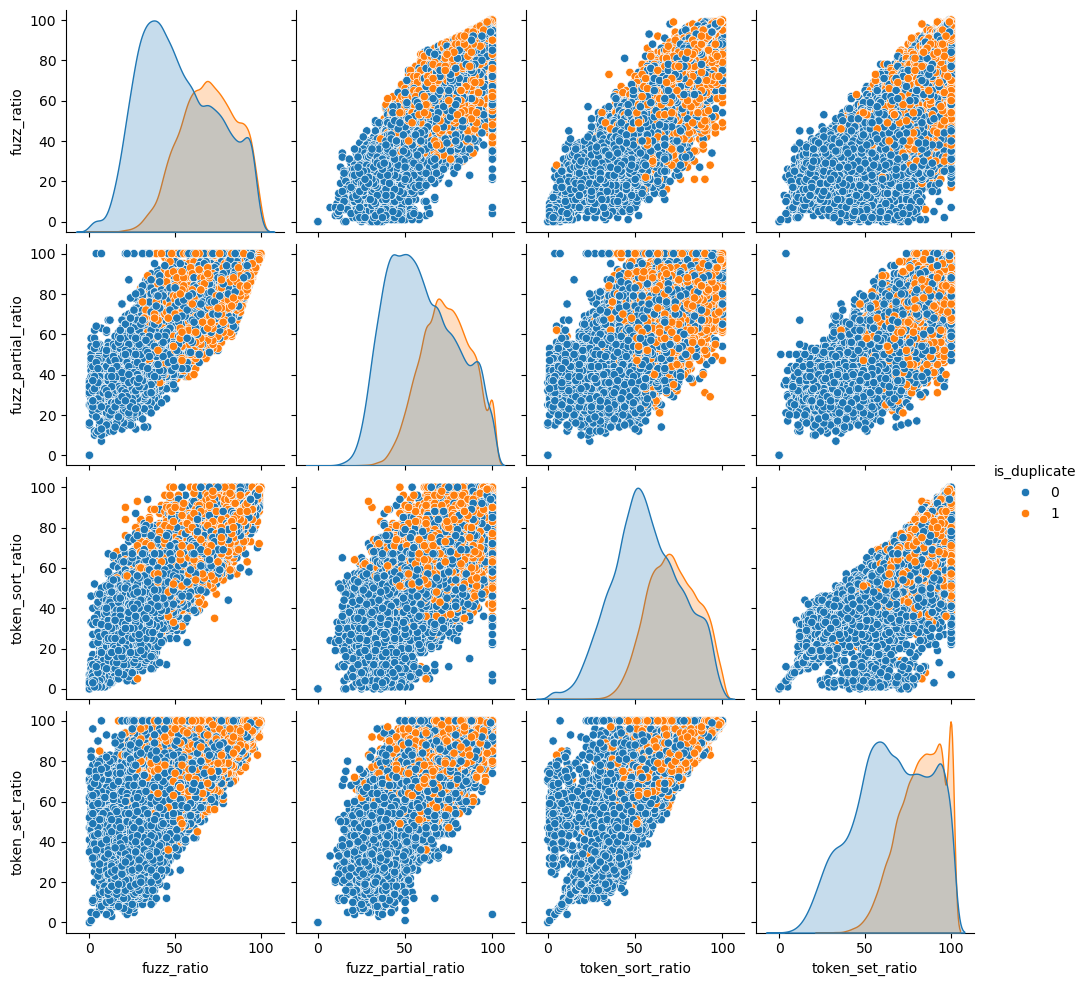

In [29]:
sns.pairplot(df1[['fuzz_ratio',	'fuzz_partial_ratio',	'token_sort_ratio',	'token_set_ratio', 'is_duplicate']],hue = 'is_duplicate')

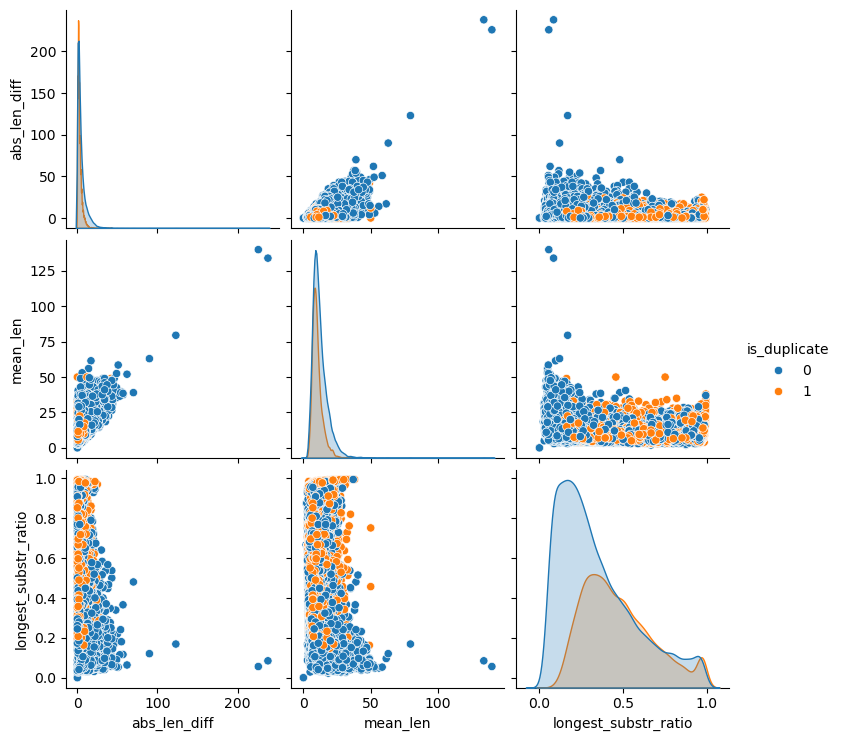

In [30]:
sns.pairplot(df1[['abs_len_diff','mean_len','longest_substr_ratio','is_duplicate']],hue = 'is_duplicate')

In [31]:
final_df = df1.drop(columns=['id','qid1','qid2','question1','question2'])

In [32]:
final_df.head(5)

,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,first_word_eq,last_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,76.0,77.0,13,13,12,26,0.46,0.874989,0.874989,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,49.0,57.0,13,16,8,24,0.33,0.666644,0.499988,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,0,105.0,120.0,28,21,4,38,0.11,0.000000,0.000000,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,0,59.0,146.0,14,32,1,34,0.03,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,0,35.0,50.0,5,9,3,13,0.23,0.749981,0.599988,...,0.333330,0.0,1.0,4.0,7.0,0.542857,55,70,48,69


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 398782 to 103130
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_duplicate          70000 non-null  int64  
 1   q1_len                70000 non-null  float64
 2   q2_len                69999 non-null  float64
 3   q1_no_words           70000 non-null  int64  
 4   q2_no_words           70000 non-null  int64  
 5   common_words          70000 non-null  int64  
 6   total_words           70000 non-null  int64  
 7   word_share            70000 non-null  float64
 8   cwc_min               70000 non-null  float64
 9   cwc_max               70000 non-null  float64
 10  csc_min               70000 non-null  float64
 11  csc_max               70000 non-null  float64
 12  ctc_min               70000 non-null  float64
 13  ctc_max               70000 non-null  float64
 14  first_word_eq         70000 non-null  float64
 15  last_word_eq      

In [34]:
final_df.isnull().sum()

is_duplicate            0
q1_len                  0
q2_len                  1
q1_no_words             0
q2_no_words             0
common_words            0
total_words             0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
first_word_eq           0
last_word_eq            0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [35]:
que_df = df1[['question1','question2']]
que_df.head(5)

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
q = list(df1['question1']) + list(df1['question2'])
q1_arr,q2_arr = np.vsplit(cv.fit_transform(q).toarray(),2)

In [37]:
tempdf1 = pd.DataFrame(q1_arr, index= que_df.index)
tempdf2 = pd.DataFrame(q2_arr, index= que_df.index)
tempdf = pd.concat([tempdf1,tempdf2], axis=1)
tempdf.shape

(70000, 6000)

In [38]:
final_df = pd.concat([final_df,tempdf],axis=1)
final_df.shape

(70000, 6023)

In [39]:
final_df.head(5)

,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76.0,77.0,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,49.0,57.0,13,16,8,24,0.33,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,105.0,120.0,28,21,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,59.0,146.0,14,32,1,34,0.03,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,0
151235,0,35.0,50.0,5,9,3,13,0.23,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2,random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(x_train,y_train)
y_predict = rc.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7937857142857143

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_xgb)
accuracy

0.7958571428571428

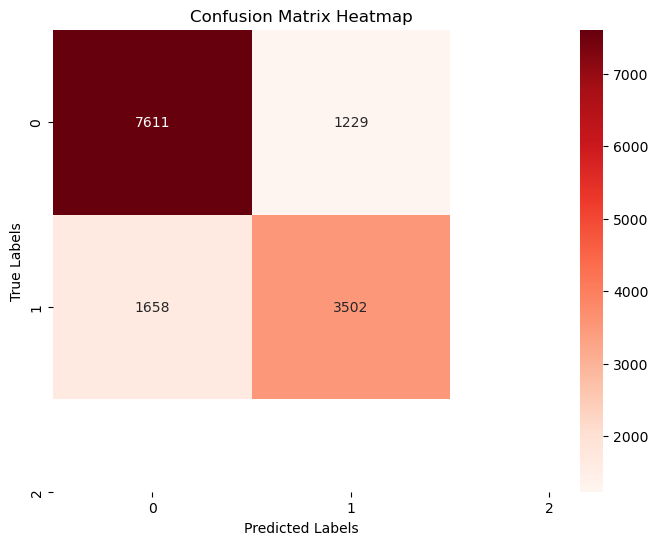

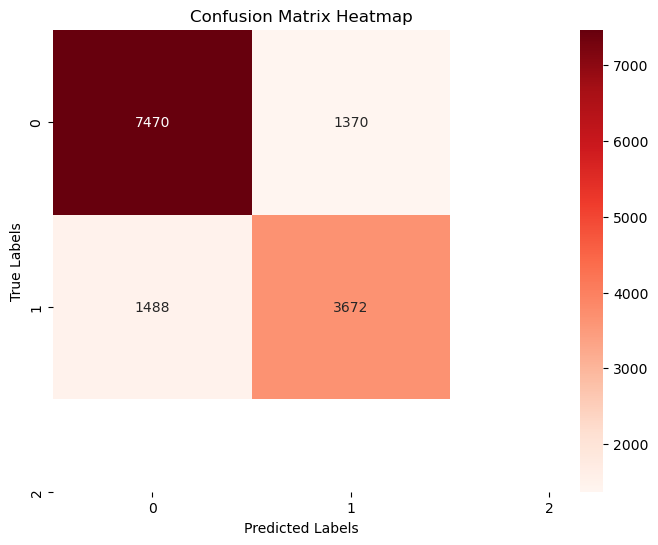

In [48]:
### from sklearn.metrics import confusion_matrix
# for randomforest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
# for xgboost
cm1 = confusion_matrix(y_test,y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [50]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [69]:
def query_point(q1,q2):
    input_query = []

    # preprocess
    q1 = prepro(q1)
    q2 = prepro(q2)

    # basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q1.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2) / test_total_words(q1,q2)))

    # token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # length features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # Fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow features for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow features for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))
    

array([[29., 36.,  6., ...,  0.,  0.,  0.]])

In [91]:
rc.predict(query_point(q1,q2))

array([0], dtype=int64)

In [ ]:
import pickle

pickle.dump(rc,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India?'

In [4]:
rc.predict(query_point(q1,q2))

NameError: name 'rc' is not defined